In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.callbacks import EarlyStopping


2024-03-12 09:22:00.051690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 09:22:00.670187: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-12 09:22:00.670241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-12 09:22:00.670247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [10]:
linkAutoencoder = "Resultados/ModelosAutoencoder/V2"

In [20]:

#Load the encoder model
encoder_model = keras.models.load_model(linkAutoencoder+"/Encoder.h5")

#Load the decoder model
decoder_model = keras.models.load_model(linkAutoencoder+"/Decoder.h5")

#Load the dataset
x = np.load("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Npy/Balanced/V1/Dataset120x360GreysNewCategories.npy")
print("x shape",x.shape)
x = x/255


x shape (1254, 120, 360)


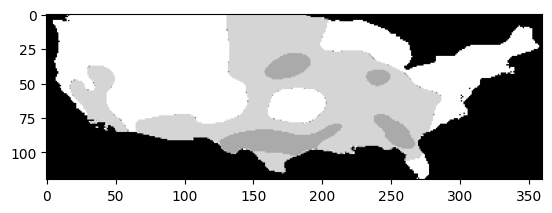

In [29]:
plt.imshow(x[0],cmap="gray")

In [19]:
contador = 0
for img in x:
    #print("shape img",img.shape)
    contador += 1
    img = img.reshape(1,120,360,1)
    img = encoder_model.predict(img)
    x_encoded = np.append(img , x_encoded)


1/1 [==============================] - 0s 17ms/step


TypeError: append() missing 1 required positional argument: 'values'

In [18]:
print("x_encoded shape",x_encoded.shape)

x_encoded shape (2508, 60, 180, 1)


In [22]:
#Encode the dataset
x_encoded = encoder_model.predict(x)
print("x_encoded shape",x_encoded.shape)

print("x max",np.max(x))
print("x min",np.min(x))
print("x_encoded max",np.max(x_encoded))
print("x_encoded min",np.min(x_encoded))
print("x dtype",x.dtype)
print("x_encoded dtype",x_encoded.dtype)
#Save the encoded dataset
np.save(linkAutoencoder+"/Dataset120x360Encoded.npy",x_encoded)


40/40 [==============================] - 0s 3ms/step
x_encoded shape (1254, 60, 180, 1)
x max 0.91764706
x min 0.07058824
x_encoded max 0.57588184
x_encoded min 0.041518927
x dtype float32
x_encoded dtype float32


x_encoded shape (1254, 60, 180)


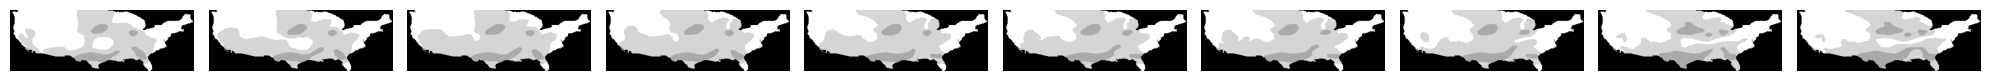

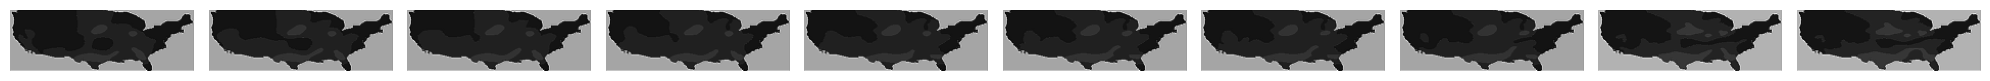

In [34]:
#mostrar imagenes del npy
def plotImages(images_arr , cmap = "gray"):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img, cmap = cmap)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

x_encoded = np.squeeze(x_encoded)
print("x_encoded shape",x_encoded.shape)
plotImages(x[0:10],cmap="gray")
plotImages(x_encoded[0:10],cmap="gray")